<a href="https://colab.research.google.com/github/Dinarque/INALCO_Inalco_M2_langage_de_scripts_2024_eleves/blob/main/TP/TP1_de_Flaubert_a_FlauBERT_eleves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP1 : De Flaubert à FlauBERT**


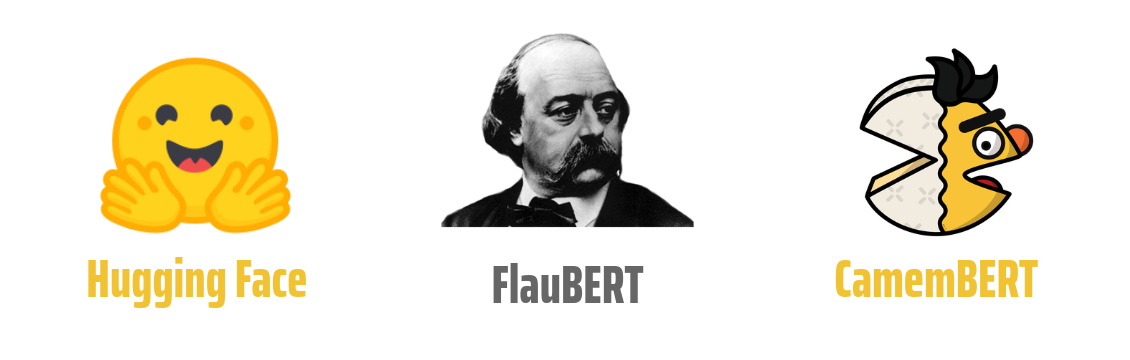

Quelques révisions du programme de première année, et au delà !

**Objectifs : **

1) Réviser les fondamentaux de l'écriture de scripts en python (structures de données et bonnes pratiques), et notamment:
* le téléchargement et l'ouverture de fichiers
* les fonctions essentielles de nettoyage du texte
* le stockage des informations pertinentes dans des structures de données adaptées

2) Savoir comment utiliser python pour répondre à des questions pratiques sur des données. Savoir réfléchir à la manière de découper une question abstraite (Ex: quel est le vocabulaire particulier de Flaubert par rapport aux autres romanciers du 19ième siècle ?) en une liste d'instructions que vous pouvez coder pour obtenir la réponse

3) Etudier (informatiquement) le style de Flaubert, car c'est un des meilleurs auteurs qui soient

# 1) préliminaires pour accéder à l'Education Sentimentale

Pour commencer par le commencement, il faut charger les textes de Flaubert.

In [9]:
flaubert = {
    "Madame_Bovary": "https://www.gutenberg.org/cache/epub/14155/pg14155.txt",
    "L_Education_sentimentale": "https://www.gutenberg.org/cache/epub/49773/pg49773.txt",
    "Bouvard_et_Pecuchet": "https://www.gutenberg.org/cache/epub/48881/pg48881.txt",
    "Salammbô": "https://www.gutenberg.org/cache/epub/12065/pg12065.txt",
    "Trois_Contes": "https://www.gutenberg.org/cache/epub/48881/pg48881.txt",
    "Un_Coeur_simple": "https://www.gutenberg.org/cache/epub/26812/pg26812.txt",
    "Dictionnaire_des_idees_recues": "https://www.gutenberg.org/cache/epub/14156/pg14156.txt"
}

* Pour ne pas poluer l'onglet du notebook, créez (en codant !!) un répertoire nommé "romans_Flaubert" dans le notebook

* Faites la même chose en python en utilisant la librairie os

le dossier existe déjà


* Téléchargez-y en utilisant la librairie urllib le texte de l'Education Sentimentale puis en utilisant la librairie os, saubegardez le roman dans le dossier que vous avez créé

* Transformez votre série d'instructions en fonction (qui prend en entrée le nom d'un roman) et téléchargez tous le corpus

* écrire une fonction  qui prend en entrée le nom d'un roman et renvoie le texte du roman stocké dans le fichier. La tester sur l'ES et afficher les 500 premières lignes

﻿The Project Gutenberg eBook of Œuvres complètes de Gustave Flaubert, tome 3: L'éducation sentimentale, v. 1
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of th


# 2) Nettoyer l'oeuvre du maître


Le texte que nous avons téléchargé n'est pas de la meilleure qualité. Comme vous le voyez on tombe sur un passage en anglais...  Réglons cela !



* Vérifiez que le texte était bien en encodage UTF-8 (vous pouvez utiliser la librairie chardet)

'UTF-8-SIG'

* Enlevez tous les caractères spéciaux (ne conserver que les caractères latins). Quelle librairie pourrait le faire le plus facilement ?



In [16]:
!pip install unidecode

﻿The Project Gutenberg eBook of Œuvres complètes de Gustave Flaubert, tome 3: L'éducation sentimentale, v. 1
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of th


* Enlevez tous les contenus textuels qui ne sont pas l'oeuvre de Flaubert (vous pouvez garder les préfaces, que vous encoderez le cas échéant avec la clé "preface" dans la question suivante).
Indice : ils sont en anglais !

In [18]:
!pip install nltk langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=311d84a6d79745bd487a8c2ee66733b90faf5b02058b127e8241f3ddbe1fa4c7
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


La ponctuation n'a pas ete modifiee hormis quelques corrections
  mineures. Seuls quelques mots ont ete modifies. La liste des modifications se trouve a la fin du texte. EDITION DEFINITIVE D'APRES LES MANUSCRITS ORIGINAUX


  OEUVRES COMPLETES

  DE

  GUSTAVE FLAUBERT


  III

  L'EDUCATION SENTIMENTALE

  I


  PARIS

  A. QUANTIN, IMPRIMEUR-EDITEUR

  RUE SAINT-BENOIT, 7

  1885


  TOUS DROITS RESERVES




PREMIERE PARTIE

L'EDUCATION SENTIMENTALE

I


Le 15 septembre 1840, vers six heures d


# 3) Organiser l'oeuvre

L'objectif de cette partie sera de stocker de manière efficace toute l'oeuvre de Flaubert dans la variable "oeuvre_Flaubert" : un dictionnaire de dictionnaires ayant comme clé le titre du livre (sans accent) et en valeur un dictionnaire ayant comme clé le numéro de chapitre (un chiffre romain) et retournant le texte de ce chapitre.

Remarquez que chaque chapitre est noté par un chiffre romain et est précédé et suivi de deux sauts de ligne.


* écrivez une fonction prenant en entrée le texte d'un roman et effectuant un split sur les séquences du type deux sauts de ligne, une ligne avec du texte, deux sauts de ligne, et qui renvoie un dictionnaire associant la chaîne de caractère contenue entre les sauts de ligne et lui associe le texte avant la prochaine séparation


I
II
III
IV
V
VI
.I
.II
.III


dict_keys(['I', 'II', 'III', 'IV', 'V', 'VI', '.I', '.II', '.III'])
Le 15 septembre 1840, vers six heures du matin, _la Ville-de-Montereau_,pres de partir, fumait a gros tourbillons devant le


* à votre avis, faut-il mieux utiliser la fonction qui enlève l'anglais avant de procéder au découpage par chapitre ou après sur chaque chapire ? Pourquoi ? Essayez les deux et commentez les résultats

* Pour le dictionnaire des idées reçues, puisque c'est déjà un  dictionnaire dans la forme, stockez-le dans un dictionnaire qui associe à chaque mot sa  définition

Repérez que les mots définis sont en lettres capitales.
Regardez comment se structure le texte et écrivez une fonction pour traiter le dictionnaire spécifiquement

﻿The Project Gutenberg eBook of Dictionnaire des idées reçues
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Dictionnaire des idées reçues

Author: Gustave Flaubert

Release date: November 26, 2004 [eBook #14156]
                Most recently updated: December 18, 2020

Language: French

Credits: Produced by Ebooks libres et gratuits at http://www.ebooksgratuits.com


*** START OF THE PROJECT GUTENBERG EBOOK DICTIONNAIRE DES IDÉES REÇUES ***




Produced by Ebooks libres et gratuits at http://www.ebooksgratuits.com





Gustave Flaubert
DICTIONNAIRE DES IDÉES REÇUES

Oeuvre posthume (

dict_keys(['ABSALON', 'ABSINTHE', 'ACADEMIE FRANCAISE', 'ACCIDENT', 'ACCOUCHEMENT', 'ACTRICES', 'ADIEUX', 'ADOLESCENT', 'AFFAIRES (Les)', 'AGENT', 'AGRICULTURE', 'AIL', 'AIR', 'AIRAIN', 'ALBATRE', 'ALBION', 'ALCIBIADE', 'ALCOOLISME', 'ALLEMAGNE', 'ALLEMANDS', 'AMBITIEUX', 'AMBITION', 'AMERIQUE', 'AMIRAL', 'ANGE', 'ANGLAIS', 'ANGLAISES', 'ANTECHRIST', 'ANTIQUITES (les)', 'APLOMB', 'APPARTEMENT de garcon', 'ARBALETE', 'ARCHIMEDE', 'ARCHITECTES', 'ARCHITECTURE', 'ARGENT', 'ARMEE', 'ARSENIC', 'ART', 'ARTISTES', 'ASPIC', 'ASSASSIN', 'ASTRONOMIE', 'ATHEE', 'AUTEUR', 'AUTRUCHE', 'AVOCATS', 'BADAUD', 'BADIGEON dans les eglises', 'BAGNOLET', 'BAGUE', 'BAILLEMENT', 'BALLONS', 'BANDITS', 'BANQUET', 'BANQUIERS', 'BARAGOUIN', 'BARBE', 'BARBIER', 'BAS-BLEU', 'BASES de la societe', 'BASILIQUE', 'BASQUES', 'BATAILLE', 'BATON', 'BAUDRUCHE', 'BAYADERE', 'BEETHOVEN', 'BERGERS', 'BETES', 'BIBLE', 'BIBLIOTHEQUE', 'BIERE', 'BILLARD', 'BLONDES', 'BOIS', "A l'automne, quand on se promene, on doit dire", 'BONN

* écrivez un code qui traite tout le corpus

II
III
IV
V
VI
VII
VIII
IX
I
.II
.III
.IV
.V
.VI
.VII
.VIII
.IX
X
XI
XII
XIII
XIV
XV
.I
..II
..III
..IV
..V
..VI
..VII
..VIII
..IX
.X
.XI
small bug with language detection
I
II
III
IV
V
VI
.I
.II
.III
I
II
III
IV
V
VI
VII
VIII
IX
X
XI
XII
XIII
XIV
XV
small bug with language detection
II
III
IV
V
I
.II
.III
.I
..II
..III
I
II
III
IV
V
VI
VII
VIII
IX
X
XI
XII
XIII
XIV
XV
small bug with language detection
II
III
IV
V


* Pour vérifier que tout fonctionne bien, cherchez:
- la liste des textes stockés
- le chapitre 9 de Madame Bovary
- le texte d'un Coeur Simple
- la définition du mot "introduction" dans le Dictionnaire des idées reçues.

In [27]:
oeuvre_Flaubert.keys()

dict_keys(['Madame_Bovary', 'L_Education_sentimentale', 'Bouvard_et_Pecuchet', 'Salammbô', 'Trois_Contes', 'Un_Coeur_simple', 'Dictionnaire_des_idees_recues'])

In [28]:
oeuvre_Flaubert["Madame_Bovary"]["IX"]

"Souvent, lorsque Charles etait sorti, elle allait prendre dansl'armoire, entre les plis du linge ou elle l'avait laisse, leporte-cigares en soie verte.Elle le regardait, l'ouvrait, et meme elle flairait l'odeur de sadoublure, melee de verveine et de tabac. A qui appartenait-il?...Au Vicomte. C'etait peut-etre un cadeau de sa maitresse. On avaitbrode cela sur quelque metier de palissandre, meuble mignon quel'on cachait a tous les yeux, qui avait occupe bien des heures etou s'etaient penchees les boucles molles de la travailleusepensive. Un souffle d'amour avait passe parmi les mailles ducanevas; chaque coup d'aiguille avait fixe la une esperance ou unsouvenir, et tous ces fils de soie entrelaces n'etaient que lacontinuite de la meme passion silencieuse. Et puis le Vicomte, unmatin, l'avait emporte avec lui. De quoi avait-on parle, lorsqu'ilrestait sur les cheminees a large chambranle, entre les vases defleurs et les pendules Pompadour? Elle etait a Tostes. Lui, iletait a Paris, mainten

In [29]:
" ".join(oeuvre_Flaubert["Un_Coeur_simple"].values())

'Elle avait eu, comme une autre, son histoire d\'amour.Son pere, un macon, s\'etait tue en tombant d\'un echafaudage.Puis sa mere mourut, ses soeurs se disperserent, un fermier larecueillit, et l\'employa toute petite a garder les vaches dansla campagne. Elle grelottait sous des haillons, buvait a platventre l\'eau des mares, a propos de rien etait battue, etfinalement fut chassee pour un vol de trente sols, qu\'ellen\'avait pas commis. Elle entra dans une autre ferme, y devintfille de basse-cour, et, comme elle plaisait aux patrons, sescamarades la jalousaient.Un soir du mois d\'aout (elle avait alors dix-huit ans), ilsl\'entrainerent a l\'assemblee de Colleville. Tout de suite ellefut etourdie, stupefaite par le tapage des menetriers, leslumieres dans les arbres, la bigarrure des costumes, lesdentelles, les croix d\'or, cette masse de monde sautant a lafois. Elle se tenait a l\'ecart modestement, quand un jeunehomme d\'apparence cossue, et qui fumait sa pipe les deuxcoudes sur le tim

In [30]:
oeuvre_Flaubert['Dictionnaire_des_idees_recues'].keys()

dict_keys(['ABSALON', 'ABSINTHE', 'ACADEMIE FRANCAISE', 'ACCIDENT', 'ACCOUCHEMENT', 'ACTRICES', 'ADIEUX', 'ADOLESCENT', 'AFFAIRES (Les)', 'AGENT', 'AGRICULTURE', 'AIL', 'AIR', 'AIRAIN', 'ALBATRE', 'ALBION', 'ALCIBIADE', 'ALCOOLISME', 'ALLEMAGNE', 'ALLEMANDS', 'AMBITIEUX', 'AMBITION', 'AMERIQUE', 'AMIRAL', 'ANGE', 'ANGLAIS', 'ANGLAISES', 'ANTECHRIST', 'ANTIQUITES (les)', 'APLOMB', 'APPARTEMENT de garcon', 'ARBALETE', 'ARCHIMEDE', 'ARCHITECTES', 'ARCHITECTURE', 'ARGENT', 'ARMEE', 'ARSENIC', 'ART', 'ARTISTES', 'ASPIC', 'ASSASSIN', 'ASTRONOMIE', 'ATHEE', 'AUTEUR', 'AUTRUCHE', 'AVOCATS', 'BADAUD', 'BADIGEON dans les eglises', 'BAGNOLET', 'BAGUE', 'BAILLEMENT', 'BALLONS', 'BANDITS', 'BANQUET', 'BANQUIERS', 'BARAGOUIN', 'BARBE', 'BARBIER', 'BAS-BLEU', 'BASES de la societe', 'BASILIQUE', 'BASQUES', 'BATAILLE', 'BATON', 'BAUDRUCHE', 'BAYADERE', 'BEETHOVEN', 'BERGERS', 'BETES', 'BIBLE', 'BIBLIOTHEQUE', 'BIERE', 'BILLARD', 'BLONDES', 'BOIS', "A l'automne, quand on se promene, on doit dire", 'BONN

In [ ]:
oeuvre_Flaubert["Dictionnaire_des_idees_recues"]['INTRODUCTION']

' Mot obscene.'

# 4) Des questions simples sur un Coeur Simple

* Quelle est l'oeuvre la plus longue de Flaubert ? La plus courte ? Leur longueur moyenne ?

{'Madame_Bovary': 238635, 'L_Education_sentimentale': 354331, 'Bouvard_et_Pecuchet': 667289, 'Salammbô': 80846, 'Trois_Contes': 667196, 'Un_Coeur_simple': 67991, 'Dictionnaire_des_idees_recues': 36136}


min Dictionnaire_des_idees_recues 36136
max Trois_Contes 656943
mean 376547.71428571426


Quelle oeuvre comporte le plus de chapitre ? (On exclue bien sur le dictionnaire)

{'ABSALON': " S'il eut porte perruque, Joab n'aurait pu le tuer.",
 'ABSINTHE': ' Poison extra-violent',
 'ACADEMIE FRANCAISE': " La denigrer, mais tacher d'en faire partie si on peut.",
 'ACCIDENT': ' Toujours deplorable ou facheux (comme si on devait jamais trouver un malheur une chose rejouissante...).',
 'ACCOUCHEMENT': ' Mot a eviter; le remplacer par evenement.',
 'ACTRICES': ' La perte des fils de famille.',
 'ADIEUX': ' Mettre des larmes dans sa voix en parlant des adieux de Fontainebleau.',
 'ADOLESCENT': ' Ne jamais commencer un discours de distribution des prix autrement que par <<Jeunes adolescents>> (ce qui est un pleonasme).',
 'AFFAIRES (Les)': ' Passent avant tout.',
 'AGENT': ' Terme lubrique.',
 'AGRICULTURE': " Une des mamelles de l'Etat (l'Etat est du genre masculin, mais ca ne fait rien).",
 'AIL': " Tue les vers intestinaux et dispose aux combats de l'amour.",
 'AIR': " Toujours se mefier des courants d'air.",
 'AIRAIN': " Metal de l'antiquite.",
 'ALBATRE': ' Ser

{'Madame_Bovary': 34, 'L_Education_sentimentale': 9, 'Bouvard_et_Pecuchet': 15, 'Salammbô': 10, 'Trois_Contes': 15, 'Un_Coeur_simple': 4}
Un_Coeur_simple
Madame_Bovary


* Combien y-a-t-il de phrases fans "Un Coeur Simple" ?

370


* Combien-y-a-t-il de mots dans "Un Coeur Simple" ?

11408


* Et de mots uniques ?  Enlevez les mots les plus fréquents (les stopwords de nltk suffiront)

3804


* Et de lemmes uniques ? ... Gardons ça pour la partie suivante

# 5) Lemmatisation sentimentale

* Récupérez le texte de l'Education sentimentale

* https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer Cette gentille personne a pris de son temps pour coder un lemmatiseur. Faites en sorte de le charger puis créer une fonction qui l'utilise et appliquez là à notre texte  

  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to /tmp/pip-req-build-8kj72snj
  Running command git clone --filter=blob:none --quiet https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git /tmp/pip-req-build-8kj72snj
  Resolved https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to commit bc0ebd0135a6cc78f48ddf184069b4c0b9c017d8
  Preparing metadata (setup.py) ... done
  Created wheel for FrenchLefffLemmatizer: filename=FrenchLefffLemmatizer-0.3-py3-none-any.whl size=3533514 sha256=e5a82fa0f7fffdfce0927c980e3ec2d09a43e5ee0d6dd6804d06edbb5f7f2fa8
  Stored in directory: /tmp/pip-ephem-wheel-cache-ifen71pk/wheels/99/54/81/553bffdc8e0781c925f9a26606894935adb29b56175a9a358b
Successfully built FrenchLefffLemmatizer


* Etudiez les résultats de cette lemmatisation ? Qu'en pensez-vous ?
Essayez de lemmatiser quelques mots (indice : essayez des verbes conjugués)

* Oui, je suis d'accord, il faut aller chercher un autre lemmatiseur...
Prenons simplement celui fourni par Spacy, la librairie NLP à tout faire...




In [98]:
!pip3 install spacy
!python3 -m spacy download fr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 13.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


* Le pipeline de Spacy crée un objet token.  Quels sont ces champs ? Lequel devez-vous récupérer pour répondre à la question ?

['_', '__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', 'ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_id', 'ent_id_', 'ent_iob', 'ent_iob_', 'ent_kb_id', 'ent_kb_id_', 'ent_type', 'ent_type_', 'get_extension', 'has_dep', 'has_extension', 'has_head', 'has_morph', 'has_vector', 'head', 'i', 'idx', 'iob_strings', 'is_alpha', 'is_ancestor', 'is_ascii', 'is_bracket', 'is_currency', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_sent_end', 'is_sent_start', 'is_space', 'is_stop', 'is_title', 'is_upper', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex', 'lex_id', 'like_email', 'like

des
12188161997964598936
un


ouvrir


* écrire une fonction prenant en entrée un texte et renvoyant la distribution des lemmes

[(',', 7203), ('le', 5099), ('de', 4203), ('.', 2649), ('un', 2434), ('avoir', 1915), ('il', 1730), ('son', 1339), ('et', 1269), ('se', 1161), (';', 881), ('que', 769), ('en', 740), ('ne', 654), ('!', 652), ('lui', 592), ('dans', 575), ('ce', 521), ('>', 494), ('être', 455), ('-', 426), ('luire', 418), ('tout', 398), ('au', 394), ('sur', 390), ('pour', 357), ('pas', 354), ('Frederic', 338), ('faire', 331), ('Arnoux', 317), ('qui', 310), ('on', 308), ('par', 306), ('etait', 298), ('pouvoir', 296), ('comme', 293), ('<', 292), ('avec', 282), ('je', 276), ('plus', 253), ('dire', 241), ('ou', 207), ('autre', 206), ('?', 197), ('vous', 193), ('y', 190), ('mais', 188), ('mme', 151), ('deux', 144), ('bien', 136), ('aller', 136), ('sans', 134), ('voir', 131), (':', 130), ('grand', 126), ('eter', 124), ('meme', 114), ('si', 107), ('femme', 106), ('chez', 105), ('petit', 104), ('à', 104), ('me', 103), ('_', 101), ('homme', 101), ('venir', 100), ('prendre', 99), ('m.', 98), ('vouloir', 97), ('sou'

* Commentez les premiers éléments de cette liste. Comment appelle-t-on ce genre de mots ? Que faire ? Modifiez la fonction en conséquence.



[('Frédéric', 345), ('Arnoux', 315), ('faire', 256), ('être', 168), ('bien', 141), ('mme', 140), ('grand', 135), ('voir', 115), ('femme', 112), ('venir', 104), ('homme', 103), ('petit', 103), ('avoir', 103), ('prendre', 101), ('vouloir', 101), ('chose', 100), ('trouver', 99), ('Deslauriers', 97), ('aller', 95), ('m.', 85), ('passer', 83), ('jour', 81), ('rien', 79), ('heure', 78), ('fois', 75), ('savoir', 75), ('main', 72), ('-ce', 71), ('air', 70), ('mettre', 70), ('bon', 69), ('oeil', 68), ('contre', 65), ('porte', 64), ('rue', 64), ('jusque', 63), ('bras', 62), ('temps', 61), ('devoir', 59), ('donner', 59), ('Hussonnet', 58), ('tête', 57), ('long', 56), ('milieu', 55), ('répondre', 55), ('apercevoir', 54), ('jeune', 54), ('Dambreuse', 54), ('demander', 51), ('haut', 50), ('ami', 50), ('soir', 50), ('maison', 49), ('Pellerin', 49), ('paraître', 48), ('-là', 48), ('vieux', 48), ('parler', 47), ('il', 46), ('connaître', 46), ('croire', 46), ('place', 45), ('coup', 45), ('entrer', 45), 

# 6) Les adjectifs d'Emma

Le but de cette question est de trouver tous les adjectifs utilisés par Flaubert pour décrire Mme Bovary.

* Chargez le texte de Mme Bovary

Quels sont tous les personnages principaux de l'oeuvre ? Indice : utiliser un système de NER
Quels sont tous les noms du personnage principal ? Commentez les résultats.
On ne fera pas mieux ce n'est pas l'essentiel.

[('Emma', 299),
 ('Charles', 245),
 ('Leon', 104),
 ('Rodolphe', 90),
 ('Madame', 31),
 ('Justin', 29),
 ('Binet', 24),
 ('Hippolyte', 23),
 ('pere Rouault', 22),
 ('M. Homais', 22),
 ('Berthe', 20),
 ('Bertaux', 19),
 ('M. Lheureux', 19),
 ('Canivet', 19),
 ('Lheureux', 17),
 ('Monsieur', 16),
 ('Bournisien', 15),
 ('Lefrancois', 14),
 ('Lestiboudois', 13),
 ('madame Homais', 13),
 ('Felicite', 12),
 ('Hivert', 11),
 ('M. Leon', 9),
 ('madame Lefrancois', 8),
 ('M.', 7),
 ('Athalie', 7),
 ('madame', 7),
 ('Vincart', 7),
 ('Voila', 6),
 ('Marquis', 6),
 ('Vicomte', 6),
 ('Huchette', 6),
 ('M. Boulanger', 6),
 ('Bridoux', 6),
 ('Aveugle', 6),
 ('Voltaire', 5),
 ('mere Lefrancois', 5),
 ('Napoleon', 5),
 ('madame Tuvache', 5),
 ('M. Tuvache', 5),
 ('M. Binet', 5),
 ('ecrivit', 5),
 ('madame Bovary', 4),
 ('Tuvache', 4),
 ('Rolet', 4),
 ('Monseigneur', 4),
 ('aRouen', 4),
 ('Adieu', 4),
 ('Bovary.--', 4),
 ('M. Bournisien', 4),
 ('Caron', 4),
 ('Lucie', 4),
 ('ellene', 3),
 ('sansdoute', 

* Trouvez maintenant tous les adjectifs qui sont utilisés pour décrire Madame Bovary.

(indice : utilisez un système de POS TAGGING)
(indice 2: sélectionnez les adjectifs et regardez leur tête)

In [ ]:
# Expérimentez avec le POS TAGGER de Spacy pour comprendre comment il fonctionne



['Tuvache', 'présente', 'Tuvache', 'Tuvache', 'écriant:--', 'Tuvache.--', 'chère', 'faible', 'éblouie']


* Analysez les résultats. Qu'en pensez-vous ?
écrivez une fonction qui parse un texte, sélectionne les adjectifs et retourne la liste des tuples contenant un adjectif et sa tête ? QUe constatez-vous ?

* Effectivement spacy ne donne pas de bons résultats. Utilisez le module de l'université de Stanford (stanza) et refaires le même travail

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: fr (French) ...
INFO:stanza:File exists: /root/stanza_resources/fr/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fr (French):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unp

* Exécutez les deux fonctions sur Charles et Emma.
Que pouvez-vous dire des résultats ?

spacy :  []
stanza :  ['chère']


[('jolis', 'succès'),
 ('longs', 'cheveux'),
 ('courts', 'longs'),
 ('1er', 'mangeait'),
 ('bons', 'termes'),
 ('autres', 'convoitises'),
 ('incertaine', 'promesse'),
 ('tel', 'promesse'),
 ('fantastique', 'feuillage'),
 ('folâtres', 'compagnies'),
 ('tout', 'ce'),
 ('verni', 'pied'),
 ('illustre', 'docteur'),
 ('pauvre', 'clerc'),
 ('petit', 'médecin'),
 ('sûr', 'sentait'),
 ('quatrième', 'étage'),
 ('riche', 'femme'),
 ('tous', 'billets'),
 ('rouge', 'croix'),
 ('toute', 'nuit'),
 ('serrée', 'gorge'),
 ('pâles', 'joues'),
 ('bon', 'augure'),
 ('tous', 'hôtels'),
 ('impraticables', 'plaisirs'),
 ('philosophiques', 'réflexions'),
 ('terrestres', 'affections'),
 ('éternel', 'isolement'),
 ('naïve', 'imitation'),
 ('sienne', 'provoquait'),
 ('jeune', 'homme'),
 ('tout', 'temps'),
 ('autres', 'vocations'),
 ('progressive', 'confidence'),
 ('complète', 'exposition'),
 ('petite', 'semblait'),
 ('vieux', 'fauteuil'),
 ('jaune', 'papier'),
 ('nue', 'tête'),
 ('blanche', 'raie'),
 ('éternelles

* Pensez un algorithme qui compare le résultat des deux systèmes, calcule un pourcentage de concordance et de discordances sur les têtes et renvoie la liste de réponses différentes. Bon exercice pour réviser les structures de données !

* Notre système ne renvoie que peu de réponses... ce qui est en fait logique. pourquoi ? Comment faire pour avoir la vraie réponse à notre question littéraire

* BONUS : Implémentez cette solution




* BONUS : proposez un protocole pour évaluer les différents systèmes sur notre tâche précise (repérer tous les adjectifs d'un texte et déterminer correctement leur tête) et uilisez-le pour évaluer les deux systèmes

# 7) spécificités du vocabulaire flaubertien

Le but de cette partie est d'étudier la spécificié du texte de flaubert par rapport à d'autres auteurs de la même époque.  Pour cela on va télécharger un corpus d'auteurs du XIX ième siècle.



* téléchargez le corpus CIDRE

https://www.ortolang.fr/market/corpora/cidre
https://github.com/oseminck/cidre/tree/main/CIDRE

écrivez une fonction qui charge tous les textes contenus dans chaque sous dossier de ce dossier dans un dossier nommé cidre. Affichez la liste des fichiers des textes qui sont là. comptez le nombre de texte. (en bash sinon ce n'est pas drôle)

In [107]:
!mkdir cidre
!git clone https://github.com/oseminck/cidre.git
!cd cidre/CIDRE

Cloning into 'cidre'...
remote: Enumerating objects: 500, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 500 (delta 22), reused 106 (delta 18), pack-reused 390 (from 1)
Receiving objects: 100% (500/500), 77.87 MiB | 15.78 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (427/427), done.


Files in cidre/CIDRE/aimard/:
1858_Le_chercheur_de_pistes.epub.txt	   1869_Le_forestier.epub.txt
1858_Le_Grand_Chef_des_Aucas.epub.txt	   1874_La_Belle-Riviere.epub.txt
1858_Les_pirates_des_prairies.epub.txt	   1876_Le_Chasseur_de_rats.epub.txt
1858_Les_trappeurs_de_l_Arkansas.epub.txt  1876_Le_commandant_Delgres.epub.txt
1859_La_loi_de_Lynch.epub.txt		   1877_L_Olonnais.epub.txt
1859_L_eclaireur.epub.txt		   1877_Vent-en-Panne.epub.txt
1861_Les_Rodeurs_de_frontieres.epub.txt    1878_L_Aigle-Noir_des_Dacotahs.epub.txt
1864_Le_Guaranis.epub.txt		   1878_Le_Mangeur_de_poudre.epub.txt
1865_Les_bohemes_de_la_mer.epub.txt	   1879_Coeur-de-Panthere.epub.txt
1866_Les_pieds-fourchus.epub.txt	   1879_Les_Forestiers_du_Michigan.epub.txt
1867_Jim_l_Indien.epub.txt		   1879_Les_Terres_d_Or.epub.txt
1868_Ourson_Tete-de-Fer.epub.txt	   1881_Les_bandits_de_l_Arizona.epub.txt
Files in cidre/CIDRE/balzac/:
 1829_Les_Chouans.txt
 1830_Gobseck.txt
 1830_La_Maison_du_chat-qui-pelote.txt
 1830_La_Vendetta.

422


Pour repérer le vocabulaire propre à Flaubert, nous allons:
* constituer un corpus 19 ieme siecle (liste de texte, chaque élément de la liste correspond à une oeuvre) et un corpus de Flaubert
* utiliser tf idf pour trouver les mots du corpus de Flaubert qui ne sont pas usuels dans l'autre

* écrivez une fonction qui parcourt le corpus cidre et renvoie un dictionnaire associant le nom du fichier txt au texte qu'il contient.



421


small bug with language detection
small bug with language detection


*  Créez un corpus global

dict_keys(['Madame_Bovary', 'L_Education_sentimentale', 'Bouvard_et_Pecuchet', 'Salammbô', 'Trois_Contes', 'Un_Coeur_simple', 'Dictionnaire_des_idees_recues'])


* rensegnez vous sur le tf idf vectorizer de scikit learn et utilisez-le pour répondre à la question : quels sont les 100 mots les plus idiomatiques de Flaubert



aubain: 0.22158485438350317
carthage: 0.17662132860658197
barbares: 0.16847268075075944
tetrarque: 0.0986600754578022
carthaginois: 0.08570629187025691
mercenaires: 0.08520708422273504
felicite: 0.08447376272179552
hamilcar: 0.0748317885514227
bovary: 0.07475724284575602
matho: 0.07161803076508055
bourais: 0.06923073340315583
leon: 0.05721886431086626
fenetre: 0.0527875109681471
etablissement: 0.04188850652569872
boheme: 0.04068862398116162
toucques: 0.037278087217083894
theatre: 0.03678580094876789
spendius: 0.03523464776559482
eveque: 0.03393023583749111
salammbo: 0.03347820874727747
loulou: 0.03337367492350546
liebard: 0.029940762513663455
poele: 0.02862768003141007
cafe: 0.028388895664221606
chale: 0.02805594577348927
diner: 0.027396039017149654
etudiants: 0.026591624415317306
honfleur: 0.025901756063815076
cheminee: 0.02576517168480663
presenter: 0.02544815589947572
gene: 0.025308002520518298
suffete: 0.024596004428543927
piece: 0.024004614766978183
herode: 0.02316622541066407
hav

Même question sur les verbes de Flaubert, et ses adjectifs

# 8) Une question de genre : Madame Bovary est-elle un roman féminin ?

L'article qui suit traite de la représentation du genre dans le roman français.

https://aclanthology.org/2022.jeptalnrecital-humanum.8.pdf

Il y aurait selon les auteurs des critères stylistiques permettant de déterminer si le roman a été écrit par un homme ou une femme, quitte à démasquer des pseudonymmes !

* Lisez l'article. Quels sont les caractéristiques stylistiques ou formels qui différencieraient un roman écrit par un homme d'un roman écrit par une femme selon les conclusions des auteurs.

* Nous nous intéresserons particulièrement à la section 4 intitulée  "Explorations textométriques : spécificités liées aux genres"
renseignez vous sur  l’indice de spécificité (SP) de Lafon.
Trouvez ou proposez une implémentation, et testez là sur un roman de Flaubert

[('title', 84.32050480391203), ('author', 84.32050480391203), ('release', 84.32050480391203), ('november', 84.32050480391203), ('2004', 84.32050480391203), ('ebook', 84.32050480391203), ('#', 84.32050480391203), ('14155', 84.32050480391203), ('recently', 84.32050480391203), ('updated', 84.32050480391203), ('december', 84.32050480391203), ('2020', 84.32050480391203), ('language', 84.32050480391203), ('credits', 84.32050480391203), ('produced', 84.32050480391203), ('ebooks', 84.32050480391203), ('http', 84.32050480391203), ('//www.ebooksgratuits.com', 84.32050480391203), ('start', 84.32050480391203), ('project', 84.32050480391203), ('marie-antoine-jules', 84.32050480391203), ('senard', 84.32050480391203), ('ex-president', 84.32050480391203), ("l'assemblee", 84.32050480391203), ('tete', 84.32050480391203), ('dedicace', 84.32050480391203), ('moi-meme', 84.32050480391203), ('autorite', 84.32050480391203), ('imprevue', 84.32050480391203), ('eloquence', 84.32050480391203), ('bouilhet', 84.320

In [ ]:
* Ne lemmatisez pas et ne retenez que les noms.
Vous semblent-t-ils a priori plus masculins ou féminins ?

* Utilisez un outil d'analyse morphologique pour étudier le genre des mots.
Calculez la proportion de mots masculins et féminins dans les romans de flaubert, et dans le corpus. La différence est-elle significative ?
Et dans Mme Bovary uniquement ?


* BONUS : Lisez la section 5 de l'article. Tentez de redémontrer la conclusion de l'article ": en moyenne, les
 romanciers et romancières mentionnent plus souvent les personnages de leur propre genre." Pour cela prenez au hasard un roman du corpus CIDRE écrit par un homme et un écrit par une femme, de longueur similaire

 Pour cela:
 * téléchargez le modèle disponible sur Ortolang
 * appliquez-le à Mme Bovary, à tout le corpus de Flaubert et tout le corpus.
 * recalculez le pourcentage de termes masculin, féminins et neutres
 * conclure

#9) FlauBERT : une introduction

C'est le moment de charger sur votre Notebook le Flaubert des temps modernes !

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://aclanthology.org/2020.jeptalnrecital-taln.26.pdf


* Consultez la documentation du site Hugging Face et chargez le tokenizer associé à Flaubert sur votre machine sur votre machine.
Tokenisez une phrase de Flaubert

In [120]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 4.2 MB/s eta 0:00:00


vocab.json:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


['Il</w>',
 'était</w>',
 'une</w>',
 'fois</w>',
 'le</w>',
 'mariage</w>',
 "d'</w>",
 'Emma</w>']

* Nous allons créer un mini moteur de recherche sémantique qui va nous servir à rechercher des phrases dans un texte.

Pour cela:
* écrivez une fonction qui transforme une phrase en vecteur avec FlauBERT
* écrivez une fonction qui prend en entrée un texte et renvoie un dictionnaire associant chaque phrase à son vecteur
* écrivez une fonction prenant en entrée un dictionnaire de ce type et une phrase et renvoie la phrase du texte la plus similaire (selon la métrique de cosine similarity)

In [125]:
tokenizer = AutoTokenizer.from_pretrained('flaubert/flaubert_base_cased')
model = AutoModel.from_pretrained('flaubert/flaubert_base_cased')

model.safetensors:   0%|          | 0.00/553M [00:00<?, ?B/s]

* testez votre code sur le texte d'un coeur simple avec comme question "la mort du perroquet" et  "La calèche"

  0%|          | 0/370 [00:00<?, ?it/s]

In [136]:
p1 = "la mort du perroquet"
p2 = "perroquet joyeux"
p3 = "les médecins n'ont pas pu le sauver"

In [133]:
chercher_la_phrase(p1,index)

'Paul marchait en tete et sanglotait.M.'

In [134]:
chercher_la_phrase(p2,index)

'Quediable avait-il fait?'

In [137]:
chercher_la_phrase(p3,index)

"Une congestion l'avait tue, sans doute?"

* BONUS : modifier la fonction pour afficher les 5 meilleures phrases

* Proposez une stratégie pour deviner les synonymes des mots rares utilisés par Flaubert (cf question 8) en vous inspirant de l'index de phrases

# 10) Le gueuloir automatique

Flaubert avait l'habitude de lire ses textes à voix haute pour les retravailler.

Faites-vous plaisir et écoutez vous aussi la belle prose de ce génie.

* Allez sur le site Hugging Face et téléchargez le modèle de Speech-to-text (STT) de votre choix, puis utilisez-le pour écouter le sacrifice de Moloch (Salammbô" chapitre 9)

BONUS :
* Si le modèle que vous avez choisi vous le permet, faites en sorte qu'il "gueule" le texte

* Modifiez les paramètres pour que le modèle lise de façon drôlatique un passage de votre choix issu de Bouvard et Pécuchet

In [1]:
!pip install --upgrade pip
!pip install --upgrade transformers scipy

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


* upload a model and write a function that creates an audio file from a text

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/8.81k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

KeyboardInterrupt: 

"Souvent, lorsque Charles etait sorti, elle allait prendre dansl'armoire, entre les plis du linge ou elle l'avait laisse, leporte-cigares en soie verte.Elle le regardait, l'ouvrait, et meme elle flairait l'odeur de sadoublure, melee de verveine et de tabac. A qui appartenait-il?...Au Vicomte. C'etait peut-etre un cadeau de sa maitresse. On avaitbrode cela sur quelque metier de palissandre, meuble mignon quel'on cachait a tous les yeux, qui avait occupe bien des heures etou s'etaient penchees les "

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/usr/local/lib/python3.10/dist-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


* comme ça c'est vraiment long... activer le GPU pourrait aider :)